Pesquisando valores de apartamentos T0,T1 e T2 no site do Imovirtual em Lisboa...
As médias de preços para cada são: T0:960€, T1: 1013€, T2: 1561€
 
Foram encontradas um total de 72 apartamentospara arrendar sendo:
 T0: 24;
 T1: 24;
 T2: 24.
 
 Foi verificado que o apartamento T0 mais caro custa: 2100 € e o mais barato custa: 550
 Foi verificado que o apartamento T1 mais caro custa: 1500 € e o mais barato custa: 750
 Foi verificado que o apartamento T2 mais caro custa: 4500 € e o mais barato custa: 600



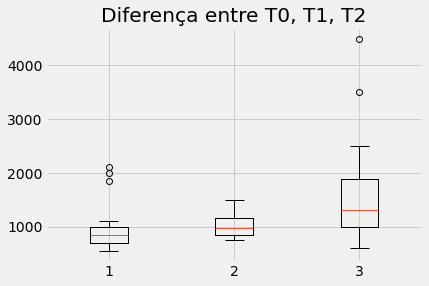

In [120]:
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt 
import numpy as np 

print("Pesquisando valores de apartamentos T0,T1 e T2 no site do Imovirtual em Lisboa...")

resultst0, resultst1, resultst2 = [], [], []
mediat0, mediat1,mediat2 = 0,0,0
#Analise da primeira página para o teste correr mais rapidamente.
NPagest0 = 1 #13
NPagest1 = 1 #82
NPagest2 = 1 #120

#T0

for page in range(1,NPagest0+1):
    source = requests.get(f"https://www.imovirtual.com/arrendar/apartamento/?search%5Bfilter_enum_rooms_num%5D%5B0%5D=zero&search%5Bregion_id%5D=11&page={page}").text
    soup = BeautifulSoup(source, 'lxml')
    resultst0 += [soup.find_all('li', class_=('offer-item-price'))]
string = ""
for result in resultst0:
    for n in result:
        string += str(n)
pricet0 = re.findall(r'(?=\S)[\d\s]*(?= \S )', string)
Pricest0 = []
for prices in pricet0:
    if n is not None:
        Pricest0 += [int(prices.replace(" ",""))]

for p in Pricest0:
    mediat0 += p
#T1
for page in range(1,NPagest1+1):
    source = requests.get(f"https://www.imovirtual.com/arrendar/apartamento/lisboa/?search%5Bfilter_enum_rooms_num%5D%5B0%5D=1&search%5Bregion_id%5D=11&page={page}").text
    soup = BeautifulSoup(source, 'lxml')
    resultst1 += [soup.find_all('li', class_=('offer-item-price'))]
string = ""
for result in resultst1:
    for n in result:
        string += str(n)
pricet1 = re.findall(r'(?=\S)[\d\s]*(?= \S )', string)
Pricest1 = []
for prices in pricet1:
    if n is not None:
        Pricest1 += [int(prices.replace(" ",""))]
for p in Pricest1:
    mediat1 += p
#T2

for page in range(1,NPagest2+1):
    source = requests.get(f"https://www.imovirtual.com/arrendar/apartamento/?search%5Bfilter_enum_rooms_num%5D%5B0%5D=2&search%5Bregion_id%5D=11&page={page}").text
    soup = BeautifulSoup(source, 'lxml')
    resultst2 += [soup.find_all('li', class_=('offer-item-price'))]
string = ""
for result in resultst2:
    for n in result:
        string += str(n)
pricet2 = re.findall(r'(?=\S)[\d\s]*(?= \S )', string)
Pricest2 = []
for prices in pricet2:
    if n is not None:
        Pricest2 += [int(prices.replace(" ",""))]
for p in Pricest2:
    mediat2 += p

    
print(f"As médias de preços para cada são: T0:{int(mediat0/len(Pricest0))}€, T1: {int(mediat1/len(Pricest1))}€, T2: {int(mediat2/len(Pricest2))}€\n ")

print(f"Foram encontradas um total de {len(Pricest0)+len(Pricest1)+len(Pricest2)} apartamentospara arrendar \
sendo:\n T0: {len(Pricest0)};\n T1: {len(Pricest1)};\n T2: {len(Pricest2)}.\n ")
print(f" Foi verificado que o apartamento T0 mais caro custa: {max(Pricest0)} € e o mais barato custa: {min(Pricest0)}")
print(f" Foi verificado que o apartamento T1 mais caro custa: {max(Pricest1)} € e o mais barato custa: {min(Pricest1)}")
print(f" Foi verificado que o apartamento T2 mais caro custa: {max(Pricest2)} € e o mais barato custa: {min(Pricest2)}\n")

x = [Pricest0,Pricest1,Pricest2]
ax = plt.subplot()
ax.set_title('Diferença entre T0, T1, T2')
plt.boxplot(x)
plt.show()
